### 1

In [1]:
import sys
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

def secant(f, x_1, x_2, 
           maxiter=40, 
           ftol=100*sys.float_info.epsilon, 
           xtol=100*sys.float_info.epsilon):
    """
    secant(f, x_1, x_2 [maxiter, ftol, xtol])

    Use the secant method to find a root of `f` starting from `x_1` and `x_2`.
    Returns a list of root estimates.

    The optional keyword parameters set the maximum number of iterations
    and the stopping tolerance for values of `f` and changes in `x`.
    """
    x = [float(x_1), float(x_2)]
    y_1 = f(x_1)
    delta_x = float('inf')  # for initial pass in the loop below
    y_2 = float('inf')
    k = 1

    while abs(delta_x) > xtol and abs(y_2) > ftol:
        y_2 = f(x[k])
        delta_x = -y_2 * (x[k] - x[k - 1]) / (y_2 - y_1)  # secant step
        x.append(x[k] + delta_x)  # append new estimate

        k += 1
        y_1 = y_2  # current f-value becomes the old one next time

        if k == maxiter:
            print("Warning: Maximum number of iterations reached.")
            break

    return x

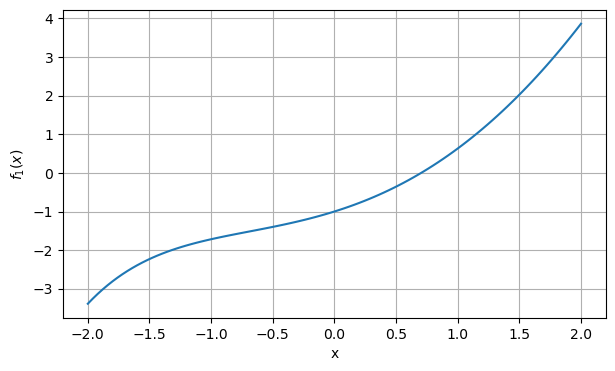

In [2]:
def f_1(x):
    # x \in [-2, 2]
    return x**2 - np.exp(-x)

# plot and determine how many roots lie in the interval
x = np.linspace(-2, 2, 101)
plt.figure(figsize=(7, 4))
plt.plot(x, f_1(x))
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.grid()
plt.show()

In [3]:
# find a reference value for the root
r_1 = root(f_1, 0.5, tol=1e-15).x[0]
print("root of f_1: ", r_1)

root of f_1:  0.7034674224983917


In [4]:
# use the newton method to find the root
x_1_seq = secant(f_1, -2, 2)
x_1_seq = np.array(x_1_seq)
print(x_1_seq)

[-2.          2.         -0.13113508  0.34867694  0.86870378  0.67909511
  0.70193705  0.70348229  0.70346741  0.70346742  0.70346742  0.70346742]


[2.70346742e+00 1.29653258e+00 8.34602499e-01 3.54790486e-01
 1.65236356e-01 2.43723130e-02 1.53037728e-03 1.48694640e-05
 9.00869868e-09 5.30686606e-14 0.00000000e+00 0.00000000e+00]


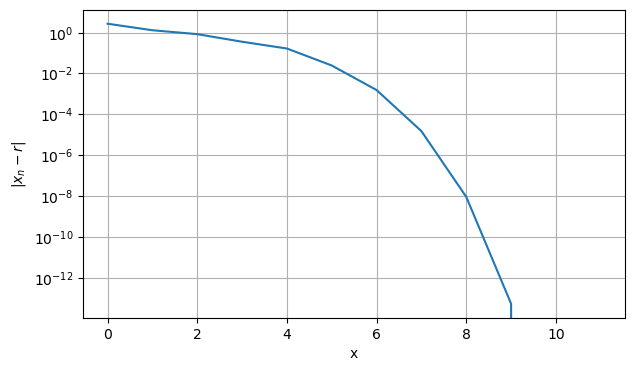

In [5]:
# compute the error and make a log-linear plot
error_x_1 = np.abs(x_1_seq - r_1)
print(error_x_1)
plt.figure(figsize=(7, 4))
plt.plot(error_x_1)
plt.xlabel('x')
plt.ylabel('$|x_n - r|$')
plt.yscale('log')
plt.grid()
plt.show()

In [6]:
# check the sequence whether the convergence is apparently between linear and quadratic
# lim \log(|\epsilon_{k+1}|) / \log(|\epsilon_k|) -> ?
[
    np.log(np.abs(error_x_1[k+1])) / np.log(np.abs(error_x_1[k])) 
    for k in range(len(error_x_1)-3)
]

[0.2611204291839701,
 -0.6962043681403637,
 5.731357681449097,
 1.7374348534446031,
 2.063070498545088,
 1.7452084896366145,
 1.714870037975572,
 1.6664933877773835,
 1.650044034687432]

### 2

In [7]:
# Please finish according to above code.

### 3

In [8]:
# Please finish according to above code.

### 4

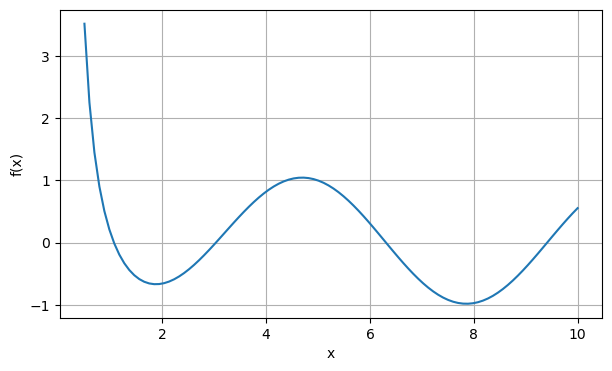

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x):
    return x**(-2) - np.sin(x)

x_interval = np.linspace(0.5, 10, 100)
plt.figure(figsize=(7, 4))
plt.plot(x_interval, f(x_interval))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [10]:
intial_points = [[0.9, 1], [3., 3.1], [6, 6.5], [9, 10]]
result_list = []
for x_1, x_2 in intial_points:
    r = secant(f, x_1, x_2)[-1]
    result_list.append([[x_1, x_2], r])

print(tabulate(result_list, headers=["x_1, x_2", "r"]))

x_1, x_2          r
----------  -------
[0.9, 1]    1.06822
[3.0, 3.1]  3.03265
[6, 6.5]    6.30832
[9, 10]     9.41349


### 9

In [11]:
import sys
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt


def iqi(f, x_1, x_2, x_3, 
        maxiter=40, 
        ftol=100*sys.float_info.epsilon, 
        xtol=100*sys.float_info.epsilon):
    # inverse quadratic interpolation
    x = [float(x_1), float(x_2), float(x_3)]
    y_1, y_2 = f(x_1), f(x_2)
    delta_x = float('inf')
    y_3 = float('inf')
    k = 1
    
    while abs(delta_x) > xtol and abs(y_3) > ftol:
        y_3 = f(x_3)
        y_values = np.array([y_1, y_2, y_3])
        x_values = np.array([x_1, x_2, x_3])
        coeffs = np.polyfit(y_values, x_values, 2)
        x_new = np.polyval(coeffs, 0)
        x.append(x_new)

        delta_x = x_new - x_3
        k += 1
        x_1, x_2, x_3 = x_2, x_3, x_new
        y_1, y_2 = y_2, y_3

        if k == maxiter:
            print("Warning: Maximum number of iterations reached.")
            break

    return x


In [12]:
# find a reference value for the root
r_1 = root(f_1, 0.5, tol=1e-15).x[0]
print("root of f_1: ", r_1)

root of f_1:  0.7034674224983917


In [13]:
# use the newton method to find the root
x_1_seq = iqi(f_1, -2, 2, 0)
x_1_seq = np.array(x_1_seq)
print(x_1_seq)

[-2.          2.          0.          0.638106    0.71646961  0.70368175
  0.70346737  0.70346742  0.70346742  0.70346742]


[2.70346742e+00 1.29653258e+00 7.03467422e-01 6.53614275e-02
 1.30021904e-02 2.14329981e-04 5.01641629e-08 3.77475828e-14
 1.11022302e-16 0.00000000e+00]


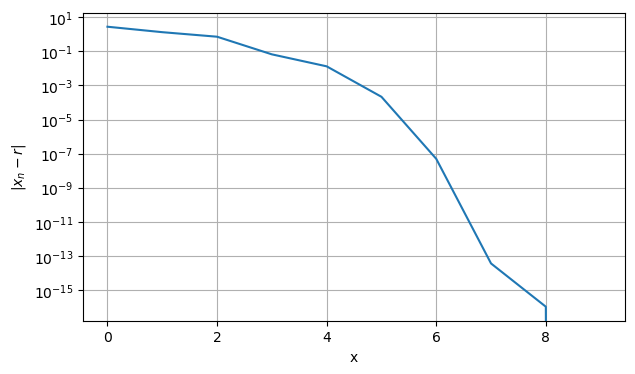

In [14]:
# compute the error and make a log-linear plot
error_x_1 = np.abs(x_1_seq - r_1)
print(error_x_1)
plt.figure(figsize=(7, 4))
plt.plot(error_x_1)
plt.xlabel('x')
plt.ylabel('$|x_n - r|$')
plt.yscale('log')
plt.grid()
plt.show()

In [15]:
# check the sequence whether the convergence is apparently between linear and quadratic
# lim \log(|\epsilon_{k+1}|) / \log(|\epsilon_k|) -> ?
[
    np.log(np.abs(error_x_1[k+1])) / np.log(np.abs(error_x_1[k])) 
    for k in range(len(error_x_1)-3)
]

[0.2611204291839701,
 -1.3544188629192129,
 7.755364075813804,
 1.5919791936570986,
 1.9453601362465434,
 1.989580652905339,
 1.8388814494951933]